### **Multinomial Naive Bayes Classification Algorithm (ML)**

### Understanding Multinomial Naive Bayes

* Multinomial Naive Bayes is a specialized variant of the Naive Bayes algorithm designed for discrete data, particularly for *text classification* where features represent word counts or frequencies. 

* Unlike Gaussian Naive Bayes, which assumes features follow a normal distribution, MultinomialNB is based on a **multinomial distribution**.

### Why Multinomial for Text Data?

* In text classification, a document is often represented as a **Bag-of-Words (BoW)**. 

* This model treats a document as an unordered collection of words, disregarding grammar and word order.

* The features are the counts of each word in the document. For example, a document might be represented by a vector like `[count_of_word1, count_of_word2, ..., count_of_wordN]`.

* The Multinomial Naive Bayes model assumes that the counts of words are generated from a multinomial distribution. 

* The algorithm works by calculating the probability of each word given a class, and then combines these probabilities to predict the class of a new document. 

* The formula for the probability of a feature (word) given a class is:

$$
P(w_i | C) = \frac{N_{C,i} + \alpha}{N_C + \alpha \cdot V}
$$

&nbsp;&nbsp;&nbsp;&nbsp;Where:
  * $N_{C,i}$: The number of times word $w_i$ appears in all documents of class $C$.
  * $N_C$: The total number of words in all documents of class $C$.
  * $\alpha$: The **Laplace smoothing** parameter. It prevents zero probabilities for words that are not present in the training data for a particular class. A common value is $\alpha=1$.
  * $V$: The total number of unique words in the vocabulary.

---

### Step 1: Import Necessary Libraries

* We will use `pandas` for data handling, `numpy` for numerical operations, `train_test_split` for splitting data, and a few key modules from scikit-learn: `CountVectorizer` for text preprocessing, `MultinomialNB` for the model, and `confusion_matrix` and `accuracy_score` for evaluation.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Step 2: Load and Explore the Dataset for Text Classification

* For this demonstration, we use the SMS Spam Collection Dataset, which contains a set of over 5,000 real-world SMS messages labeled as either Spam or Ham (non-spam). 

* This dataset is widely used for training and evaluating text classification models, particularly in spam detection tasks. 

* We downloaded it from the UCI Machine Learning Repository in a raw text file hosted [here](https://archive.ics.uci.edu/dataset/228/sms+spam+collection).

In [22]:
# Load the dataset 
df = pd.read_csv('SMSSpamCollection.csv', sep='\t', names=['label', 'message'], header=None)

# Display the first few rows of the dataset
print(df.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [23]:
# Display the count of spam and ham messages
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

### Step 3: Prepare Data for Training

* The Multinomial Naive Bayes classifier works with numerical data, specifically counts. 

* We need to convert our text messages into a numerical format using a process called **vectorization**. 

* `CountVectorizer` will handle this by:
  
  1.  Creating a vocabulary of all unique words in the corpus.
  
  2.  For each message, it will count the occurrences of each word from the vocabulary.
  
  3.  This results in a matrix where rows are messages and columns are word counts.

In [24]:
# Prepare the features and labels
X = df['message']
y = df['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer on the training data and transform both training and testing data
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [25]:
print("Training data shape (messages x vocabulary size):", X_train_counts.shape)

Training data shape (messages x vocabulary size): (3900, 7263)


In [29]:
# Sample output of the vectorized data
print(X_train_counts.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Step 4: Train the MultinomialNB Model

* We now train our `MultinomialNB` classifier using the vectorized training data. 

* The `.fit()` method will calculate the word probabilities for each class (spam and ham).

In [30]:
# Initialize Multinomial Naive Bayes classifier
mnb = MultinomialNB()

# Train the model with the vectorized training data
mnb.fit(X_train_counts, y_train)

MultinomialNB()

### Step 5: Make Predictions and Evaluate the Model

* We use the trained model to make predictions on the vectorized test data. 

* We then evaluate its performance using key metrics like accuracy and a confusion matrix.

In [31]:
# Make predictions on the test set
y_pred = mnb.predict(X_test_counts)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.99



Confusion Matrix:
[[1444    4]
 [  12  212]]


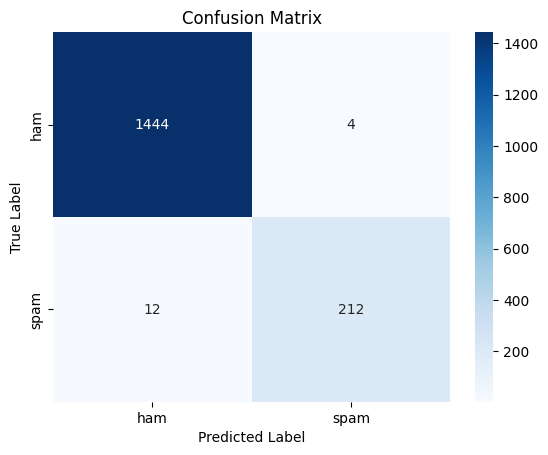

In [32]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [33]:
# Display a more detailed classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n")
print(class_report)


Classification Report:

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1448
        spam       0.98      0.95      0.96       224

    accuracy                           0.99      1672
   macro avg       0.99      0.97      0.98      1672
weighted avg       0.99      0.99      0.99      1672



### Step 6: Test with New, Unseen Messages

* Let's see how our trained model performs on new text messages it has never seen before.

In [34]:
new_messages = [
    'Free money now! Click on the link.',
    'Can we meet tomorrow?',
    'This is an urgent security alert. Your account is at risk!',
    'Final reminder to submit your report.'
]

# Vectorize the new messages using the *same* fitted vectorizer
new_messages_counts = vectorizer.transform(new_messages)

# Predict the labels for the new messages
predictions = mnb.predict(new_messages_counts)

print("Predictions for new messages:")
for message, prediction in zip(new_messages, predictions):
    print(f"Message: '{message}' -> Predicted Label: {prediction}")

Predictions for new messages:
Message: 'Free money now! Click on the link.' -> Predicted Label: spam
Message: 'Can we meet tomorrow?' -> Predicted Label: ham
Message: 'This is an urgent security alert. Your account is at risk!' -> Predicted Label: spam
Message: 'Final reminder to submit your report.' -> Predicted Label: spam


### Summary 

* This notebook demonstrates the application of Multinomial Naive Bayes for text classification. 

* We successfully trained a model to classify messages as 'spam' or 'ham' based on word frequencies. 

* The key takeaway is the importance of the text vectorization step, which transforms raw text into a numerical format that the algorithm can process effectively.

* After training the `MultinomialNB` classifier, we tested it on a few custom SMS messages. 

* The model correctly classified messages with common spam indicators such as "Free money" or "urgent security alert." 

* However, it misclassified a legitimate message - "Final reminder to submit your report" - as spam. 

* This illustrates a common challenge in spam detection: legitimate messages that use language similar to spam (e.g., reminders, deadlines, urgency) can be misclassified. 

* To improve accuracy, the model may benefit from further preprocessing (e.g., handling stopwords) or using a more advanced model like TF-IDF + Logistic Regression.

---

*Machine Learning - Python Notebook* by [*Prakash Ukhalkar*](https://github.com/prakash-ukhalkar)